# Motivation

We look at a very practical problem that is faced by finiancial institution today. How to accepet and reject credit card applications, fast and automated? The project is inspired by the following github repository: https://github.com/Ravjot03/Predicting-Credit-Card-Approvals. Our goal is to:
 - replicate the original results,
 - perform an exploretory data analysis,
 - and improve the the model prediction.

# Get the Data

In [2]:
#Importing the required packages
import pandas as pd

#Loading the dataset
cc_apps = pd.read_csv('datasets/cc_approvals.data', header=None)

#Viewing the dataset
cc_apps.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [3]:
# Print summary statistics
cc_apps_description = cc_apps.describe()
cc_apps_description

,2,7,10,14
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


# Discover and Visualize the Data to Gain Insights

According to the original repository, the probable features in a credit card application dataset are `Gender`, `Age`, `Debt`, `Married`, `BankCustomer`, `EducationLevel`, `Ethnicity`, `YearsEmployed`, `PriorDefault`, `Employed`, `CreditScore`, `DriversLicense`, `Citizen`, `ZipCode`, `Income` and finally the `ApprovalStatus`. This gives us a pretty good starting point, and we can map these features with respect to the columns in the output.

In [4]:
columns = ['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel', 
           'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 
           'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'ApprovalStatus']
cc_apps.columns = columns

In [5]:
cc_apps.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [6]:
cc_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    object 
 1   Age             690 non-null    object 
 2   Debt            690 non-null    float64
 3   Married         690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   EducationLevel  690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    object 
 14  Income          690 non-null    int64  
 15  ApprovalStatus  690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


array([[<AxesSubplot:title={'center':'Debt'}>,
        <AxesSubplot:title={'center':'YearsEmployed'}>],
       [<AxesSubplot:title={'center':'CreditScore'}>,
        <AxesSubplot:title={'center':'Income'}>]], dtype=object)

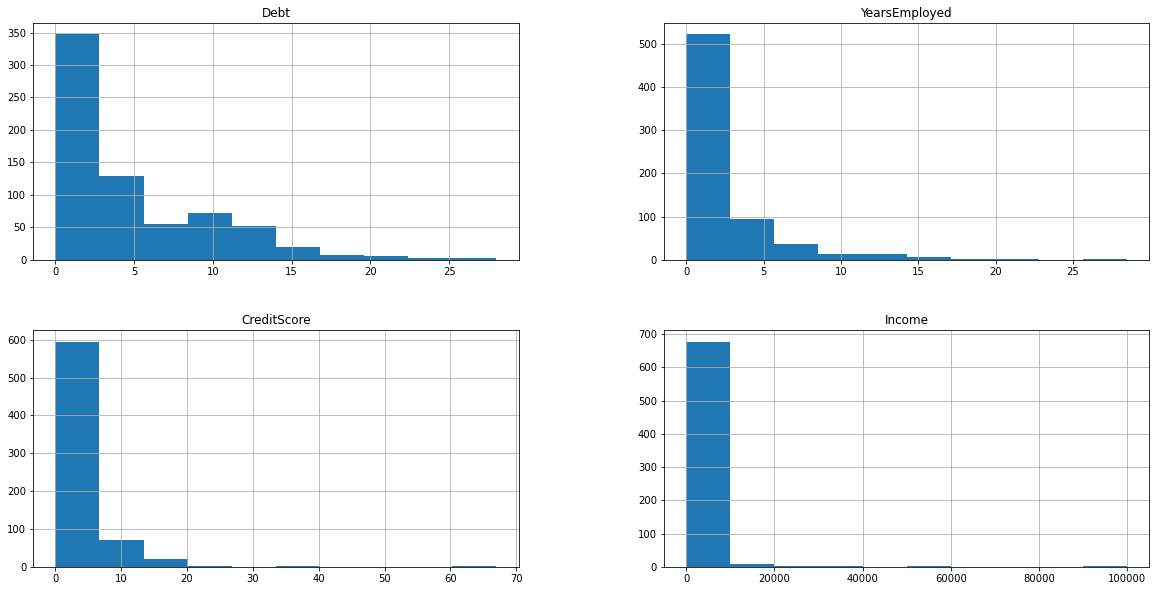

In [7]:
atts = ['Age', 'Debt', 'SibSp', 'Parch', 'Fare']
cc_apps.hist(figsize=(20,10))


# Prepare the data for ML algorithms

## Missing Values?

In [9]:
cc_apps['Gender'].value_counts()

b    468
a    210
?     12
Name: Gender, dtype: int64

It seems the NaN values are shown with ? values. Let's replace eith NumPy.

In [8]:
import numpy as np

# Replace the '?'s with NaN
cc_apps = cc_apps.replace('?',np.nan)

In [9]:
missing_counts = cc_apps.isnull().sum().sort_values(ascending = False)
percent = (cc_apps.isnull().sum()*100/cc_apps.shape[0]).sort_values(ascending = False)

missing_df = pd.concat([missing_counts, percent], axis = 1, keys = ['Counts', '%'])
print('Missing values: ')
display(missing_df.style.background_gradient(cmap = 'Reds', axis = 0))

Missing values: 


,Counts,%
ZipCode,13,1.884058
Age,12,1.739130
Gender,12,1.739130
Ethnicity,9,1.304348
EducationLevel,9,1.304348
BankCustomer,6,0.869565
Married,6,0.869565
ApprovalStatus,0,0.000000
Income,0,0.000000
Citizen,0,0.000000


The numerical fearues are all numbers with no NaN value. Now is the time to replace NaN in categorical features. We replace them with the most frequent item.

In [10]:
# Iterate over each column of cc_apps
for col in cc_apps:
    # Check if the column is of object type
    if cc_apps[col].dtype == 'object':
        # Impute with the most frequent value
        cc_apps = cc_apps.fillna(cc_apps[col].value_counts().index[0])

In [11]:
missing_counts = cc_apps.isnull().sum().sort_values(ascending = False)
percent = (cc_apps.isnull().sum()*100/cc_apps.shape[0]).sort_values(ascending = False)

missing_df = pd.concat([missing_counts, percent], axis = 1, keys = ['Counts', '%'])
print('Missing values: ')
display(missing_df.style.background_gradient(cmap = 'Reds', axis = 0))

Missing values: 


,Counts,%
ApprovalStatus,0,0.000000
Income,0,0.000000
ZipCode,0,0.000000
Citizen,0,0.000000
DriversLicense,0,0.000000
CreditScore,0,0.000000
Employed,0,0.000000
PriorDefault,0,0.000000
YearsEmployed,0,0.000000
Ethnicity,0,0.000000


## Converting non-numeric data to numerical data

In [12]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
le = LabelEncoder()

# Iterate over all the values of each column and extract their dtypes
for col in cc_apps:
    # Compare if the dtype is object
    if cc_apps[col].dtype=='object':
    # Use LabelEncoder to do the numeric transformation
        cc_apps[col]=le.fit_transform(cc_apps[col])

In [13]:
cc_apps

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,1,156,0.000,2,1,13,8,1.25,1,1,1,0,0,68,0,0
1,0,328,4.460,2,1,11,4,3.04,1,1,6,0,0,11,560,0
2,0,89,0.500,2,1,11,4,1.50,1,0,0,0,0,96,824,0
3,1,125,1.540,2,1,13,8,3.75,1,1,5,1,0,31,3,0
4,1,43,5.625,2,1,13,8,1.71,1,0,0,0,2,37,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,52,10.085,3,3,5,4,1.25,0,0,0,0,0,90,0,1
686,0,71,0.750,2,1,2,8,2.00,0,1,2,1,0,67,394,1
687,0,97,13.500,3,3,6,3,2.00,0,1,1,1,0,67,1,1
688,1,20,0.205,2,1,0,8,0.04,0,0,0,0,0,96,750,1


## Train-Test Split

In [14]:
# Import train_test_split_
from sklearn.model_selection import train_test_split

# Drop the features 'ZipCode' and 'DriversLicense' and convert the DataFrame to a NumPy array
cc_apps = cc_apps.drop(['ZipCode', 'DriversLicense'], axis=1)

# Segregate features and labels into separate variables
X,y = cc_apps.iloc[:,0:13] , cc_apps.iloc[:,-1]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                y,
                                test_size=0.3,
                                random_state=42)

## Scaling

The original notebook applied `fit_transform` method to both train and test dataset which resalts in data leakage. The correct method is to apply `fit_transform` to the training set, and **only** `transform` method to the test set.

In [15]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Select and Train a model

In [16]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fit logreg to the training dataset
logreg.fit(scaled_X_train, y_train)

LogisticRegression()

## Make a prediction

In [17]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(scaled_X_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ", logreg.score(scaled_X_test, y_test))

# Print the confusion matrix of the logreg model
confusion_matrix(y_test, y_pred)

Accuracy of logistic regression classifier:  0.8405797101449275


array([[87, 10],
       [23, 87]])

# Fine-tuning the hyperparameters

In [18]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the grid of values for tol and max_iter
tol = [0.01,0.001, 0.0001]
max_iter = [100, 150, 200]

# Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
param_grid = dict(tol = tol, max_iter = max_iter)

In [19]:
# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=logreg, param_grid= param_grid, cv=5)

# Fit data to grid_model
grid_model_result = grid_model.fit(scaled_X_train, y_train)

# Summarize results
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (grid_model_result.best_score_, grid_model_result.best_params_))

Best: 0.863230 using {'max_iter': 100, 'tol': 0.01}


# Conclusions

86% score seems fine at this stage of the project. It must be interseting to know the performance of the model on bigger data.